<p style="font-size:300%;color:white;background:#4f2d7f;padding:10px;text-align:center">
    Summer STEM Camp 2023<br>
    <font size=5>University of Central Arkansas</font>
</p>

# Lecture x:  T-test
Last modified date: 6/12/23

## Topics

Perform T-test against multiple COVID case data sets.

### Importing Python Modules

In [1]:
import pandas as pd
from scipy.stats import ttest_ind

### Data Source
- ***covidArkansas.csv*** - Daily positive cases in Arkansas
- ***covidMississippi.csv*** - Daily positive cases in Mississippi
- ***covidVermont.csv*** - Daily positive cases in Vermont

In [2]:
ar_datafile = 'covidArkansas.csv'
ms_datafile = 'covidMississippi.csv'
vt_datafile = 'covidVermont.csv'

In [50]:
ar = pd.read_csv(ar_datafile, names=['AR Cases'])
ar

,AR Cases
0,0
1,0
2,0
3,0
4,0
...,...
362,404
363,403
364,570
365,327


In [51]:
ms = pd.read_csv(ms_datafile, names=['MS Cases'])
ms

,MS Cases
0,0
1,0
2,0
3,0
4,0
...,...
361,380
362,479
363,591
364,576


In [52]:
vt = pd.read_csv(vt_datafile, names=['VT Cases'])
vt

,VT Cases
0,0
1,0
2,0
3,0
4,0
...,...
365,115
366,199
367,133
368,145


## Get summary statistics for each state

In [78]:
ar.describe()

,AR Cases
count,367.000000
mean,887.242507
std,871.066684
min,0.000000
25%,152.500000
50%,662.000000
75%,1273.000000
max,4304.000000


Sample standard deviation

In [79]:
ar['AR Cases'].std(ddof=1)

871.0666839029719

Population standard deviation

In [80]:
ar['AR Cases'].std(ddof=0)

869.8791350428037

In [54]:
ms.describe()

,MS Cases
count,366.000000
mean,813.062842
std,697.979800
min,0.000000
25%,260.500000
50%,660.500000
75%,1163.250000
max,3255.000000


In [55]:
vt.describe()

,VT Cases
count,370.000000
mean,43.467568
std,56.471978
min,0.000000
25%,4.000000
50%,11.000000
75%,79.750000
max,277.000000


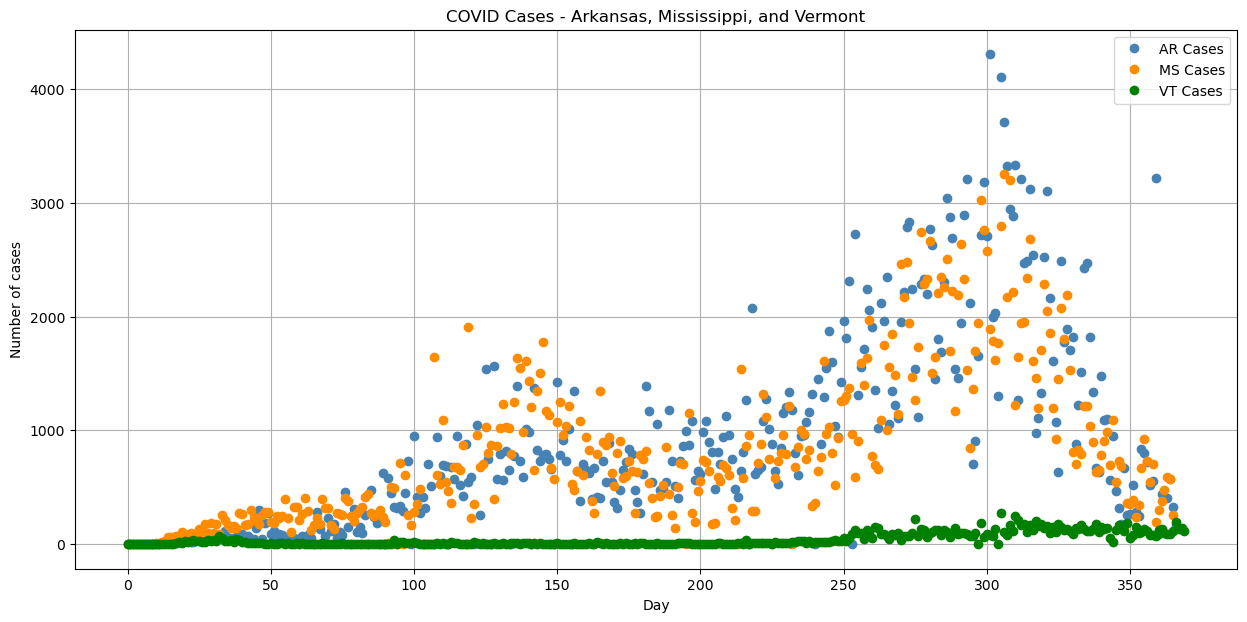

In [69]:
graphtype='line'
graphtitle = f'COVID Cases - Arkansas, Mississippi, and Vermont'

figsize = (15, 7)

xlabel = 'Day'
ylabel = 'Number of cases'

ax = ar.plot(kind=graphtype, 
             title=graphtitle,
             grid=True,
             xlabel=xlabel,
             ylabel=ylabel,
             marker='o',
             linestyle='',
             color='steelblue',
             figsize=figsize
            )

ax = ms.plot(kind=graphtype, 
             title=graphtitle,
             grid=True,
             xlabel=xlabel,
             ylabel=ylabel,
             marker='o',
             linestyle='',
             color='darkorange',
             figsize=figsize,
             ax=ax
            )

ax = vt.plot(kind=graphtype, 
             title=graphtitle,
             grid=True,
             xlabel=xlabel,
             ylabel=ylabel,
             marker='o',
             linestyle='',
             color='green',
             figsize=figsize,
             ax=ax
            )


In [74]:
t_stat, p_value = ttest_ind(ar['AR Cases'], ms['MS Cases'])
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  1.2720652092964517
P-Value:  0.20375446346720702


In [75]:
t_stat, p_value = ttest_ind(ar['AR Cases'], vt['VT Cases'])
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  18.59346288987551
P-Value:  1.5359040972443602e-63


In [76]:
t_stat, p_value = ttest_ind(ms['MS Cases'], vt['VT Cases'])
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  21.139335419472108
P-Value:  7.781702761323749e-78


### Demonstrate with states in a DataFrame

In [58]:
states = pd.concat([ar, ms, vt], axis='columns')

In [59]:
states

,AR Cases,MS Cases,VT Cases
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,0.0,0.0,0
4,0.0,0.0,0
...,...,...,...
365,327.0,260.0,115
366,165.0,NaN,199
367,NaN,NaN,133
368,NaN,NaN,145


In [60]:
states.describe()

,AR Cases,MS Cases,VT Cases
count,367.000000,366.000000,370.000000
mean,887.242507,813.062842,43.467568
std,871.066684,697.979800,56.471978
min,0.000000,0.000000,0.000000
25%,152.500000,260.500000,4.000000
50%,662.000000,660.500000,11.000000
75%,1273.000000,1163.250000,79.750000
max,4304.000000,3255.000000,277.000000


What are the total cases by state?

In [81]:
states.sum()

AR Cases    325618.0
MS Cases    297581.0
VT Cases     16083.0
dtype: float64

What is the grand total of cases across all the states?

In [82]:
states.sum().sum()

639282.0

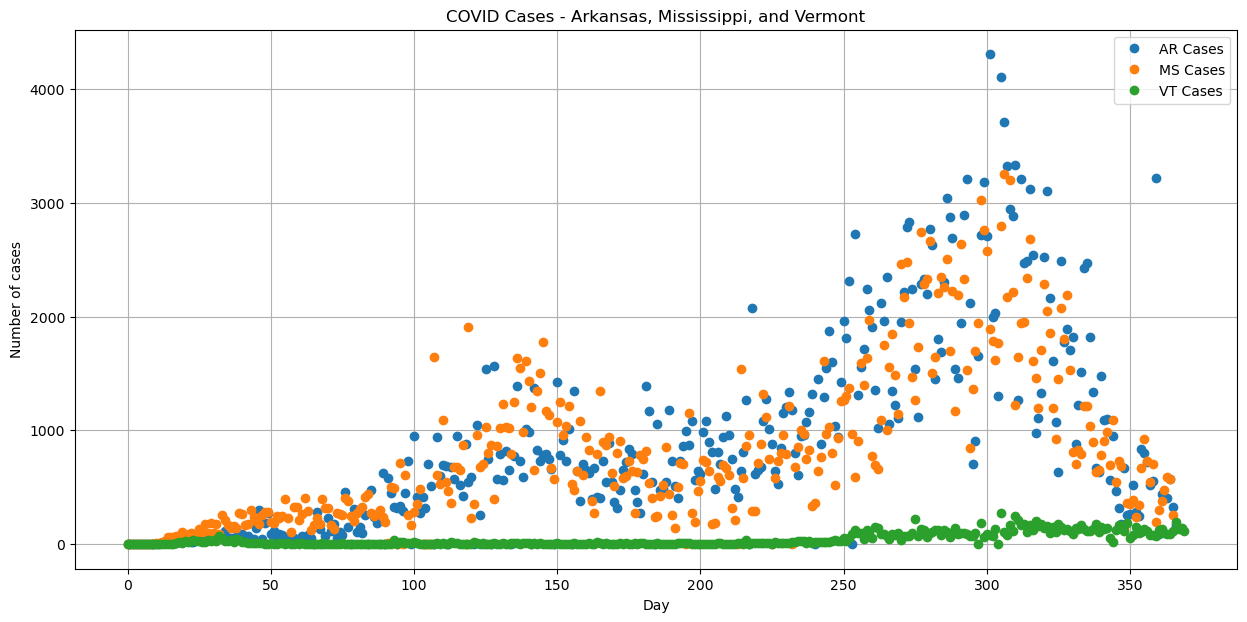

In [61]:
graphtype='line'
graphtitle = f'COVID Cases - Arkansas, Mississippi, and Vermont'

figsize = (15, 7)

xlabel = 'Day'
ylabel = 'Number of cases'

ax = states.plot(kind=graphtype, 
                 title=graphtitle,
                 grid=True,
                 xlabel=xlabel,
                 ylabel=ylabel,
                 marker='o',
                 linestyle='',
                 figsize=figsize
                )

In [63]:
t_stat, p_value = ttest_ind(states['AR Cases'].dropna(), states['MS Cases'].dropna())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  1.2720652092964517
P-Value:  0.20375446346720702


In [64]:
t_stat, p_value = ttest_ind(states['AR Cases'].dropna(), states['VT Cases'].dropna())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  18.59346288987551
P-Value:  1.5359040972443602e-63


In [65]:
t_stat, p_value = ttest_ind(states['MS Cases'].dropna(), states['VT Cases'].dropna())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  21.139335419472108
P-Value:  7.781702761323749e-78


---
<p style="font-size:70%;color:white;background:#4f2d7f;padding:10px;text-align:center">
    Copyright 2023 University of Central Arkansas
</p>